# Imports

In [175]:
import pandas as pd 
import numpy as np 

import os

import soundfile as sf

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import matplotlib.colors as mcolors

import seaborn as sns 

import librosa
import librosa.display

import warnings
warnings.filterwarnings('ignore')

## SKLearn Metrics

In [98]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay,RocCurveDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

## Loading DF w/ Extracted Features

In [99]:
music = pd.read_csv('/Users/kellyjara/Desktop/Music_Classification/Data/music3.csv')
music_df = pd.DataFrame(music)
music_df

,file_name,mfcc_mean,mfcc_var,mfcc_min,mfcc_max,mfcc1_mean,mfcc1_var,mfcc1_min,mfcc1_max,mfcc2_mean,...,tntz_min,tntz_max,melspec_mean,melspec_var,melspec_min,melspec_max,rms_mean,rms_var,tempo,genre_y
0,blues_69_segment_3.wav,-135.282870,108.55024,13.028976,43.992382,19.349297,20.206875,-1.577484,7.924092,1.519116,...,26.657469,12.485189,9.272328,4.058815,12.436750,7.658901,3.056901,10.527410,7.565155,blues
1,blues_27_segment_4.wav,-91.254100,129.46655,-4.100496,45.220657,7.252443,16.338186,0.856577,0.009967,1.849428,...,14.032310,25.550907,32.544811,9.085206,45.008915,46.512520,332.813812,129.471909,6.220565,blues
2,blues_54_segment_2.wav,-191.496080,139.01646,11.991453,28.216597,-0.720076,7.438097,6.724214,6.649870,-0.442536,...,4.716076,10.569683,13.037652,0.732540,0.283661,0.217625,0.489818,1.817209,13.725842,blues
3,blues_33_segment_1.wav,-121.252815,123.47816,13.837003,28.114388,7.535354,15.141087,-3.699708,6.035746,0.958965,...,13.126806,63.396244,21.241156,20.493299,11.539183,11.035036,10.340260,9.673729,3.113847,blues
4,blues.00009_segment_2.wav,-179.017550,138.22562,-30.912750,49.097755,-24.154978,7.536681,-9.466703,10.459454,-20.845018,...,28.867865,17.512299,12.562430,19.704935,44.741116,11.275842,0.719824,0.769180,3.037273,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6982,rock.00063_segment_2.wav,-329.291080,139.87671,53.949990,17.256727,17.011780,9.052016,8.448787,2.826561,0.794122,...,2.449042,3.578562,1.214767,1.100771,1.418536,1.387431,0.550771,0.254566,0.513779,rock
6983,rock.00004_segment_1.wav,-167.203340,143.87451,12.607652,50.331360,-0.389795,35.844570,-3.877623,16.113270,-9.246787,...,15.285677,18.517099,7.640218,10.939061,13.667733,5.664557,9.104764,4.784025,4.133267,rock
6984,rock_36_segment_5.wav,-269.519000,182.93669,9.128018,7.246886,6.279178,-1.525924,-8.689502,7.118561,-5.731806,...,0.654456,7.530454,1.434070,0.361768,8.512635,1.714976,0.366517,7.676395,1.953892,rock
6985,rock_45_segment_3.wav,39.978085,83.57576,-13.916237,31.080480,9.406852,10.378225,-1.250743,9.424727,-1.540306,...,42.720882,33.466774,29.012289,35.188614,17.988277,31.572403,30.429539,89.772820,35.103870,rock


In [100]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6987 entries, 0 to 6986
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   file_name        6987 non-null   object 
 1   mfcc_mean        6987 non-null   float64
 2   mfcc_var         6987 non-null   float64
 3   mfcc_min         6987 non-null   float64
 4   mfcc_max         6987 non-null   float64
 5   mfcc1_mean       6987 non-null   float64
 6   mfcc1_var        6987 non-null   float64
 7   mfcc1_min        6987 non-null   float64
 8   mfcc1_max        6987 non-null   float64
 9   mfcc2_mean       6987 non-null   float64
 10  mfcc2_var        6987 non-null   float64
 11  mfcc2_min        6987 non-null   float64
 12  mfcc2_max        6987 non-null   float64
 13  delta_mean       6987 non-null   float64
 14  delta_var        6987 non-null   float64
 15  delta2_mean      6987 non-null   float64
 16  delta2_var       6987 non-null   float64
 17  harmonic_mean 

In [101]:
genres = music_df['genre_y']
count = music_df['genre_y'].value_counts()

In [102]:
count

rock         743
metal        740
pop          729
hiphop       721
country      710
blues        697
classical    684
disco        678
reggae       665
jazz         620
Name: genre_y, dtype: int64

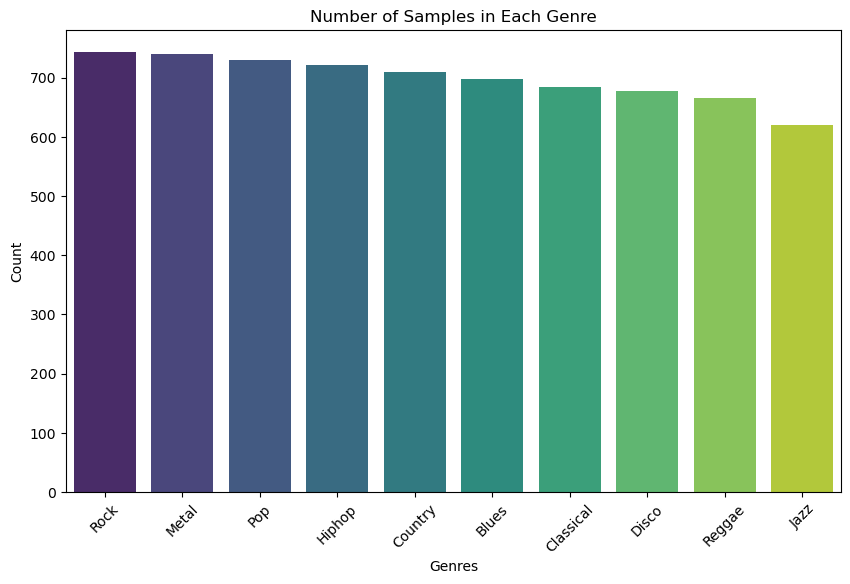

In [181]:
genre_data = ['Rock', 'Metal', 'Pop', 'Hiphop', 'Country', 'Blues', 'Classical', 'Disco', 'Reggae', 'Jazz']
count_data = [743, 740, 729, 721, 710, 697, 684, 678, 665, 620]

genre_counts_series = pd.Series(count_data, index=genre_data)

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts_series.index, y=genre_counts_series.values, palette='viridis')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Number of Samples in Each Genre')
plt.xticks(rotation=45) 

plt.show()

## OneHotEncoding Genres

In [104]:
from sklearn.preprocessing import OneHotEncoder

In [105]:
genres_df = music_df[['genre_y']]

In [106]:
ohe = OneHotEncoder(sparse = False)

genres_ohe = ohe.fit_transform(genres_df)

ohe_df = pd.DataFrame(genres_ohe, columns = ohe.get_feature_names_out(['genre_y']))

df = pd.concat([music_df, ohe_df], axis = 1)

df.drop(columns = ['genre_y'], inplace = True)

In [107]:
df.drop(columns = 'file_name', inplace = True)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6987 entries, 0 to 6986
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mfcc_mean          6987 non-null   float64
 1   mfcc_var           6987 non-null   float64
 2   mfcc_min           6987 non-null   float64
 3   mfcc_max           6987 non-null   float64
 4   mfcc1_mean         6987 non-null   float64
 5   mfcc1_var          6987 non-null   float64
 6   mfcc1_min          6987 non-null   float64
 7   mfcc1_max          6987 non-null   float64
 8   mfcc2_mean         6987 non-null   float64
 9   mfcc2_var          6987 non-null   float64
 10  mfcc2_min          6987 non-null   float64
 11  mfcc2_max          6987 non-null   float64
 12  delta_mean         6987 non-null   float64
 13  delta_var          6987 non-null   float64
 14  delta2_mean        6987 non-null   float64
 15  delta2_var         6987 non-null   float64
 16  harmonic_mean      6987 

## Train-Test-Split

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [110]:
X = df.drop(columns=['genre_y_blues', 'genre_y_classical', 'genre_y_country', 'genre_y_disco', 'genre_y_hiphop',
                     'genre_y_jazz', 'genre_y_metal', 'genre_y_pop', 'genre_y_reggae', 'genre_y_rock'])
y = df[['genre_y_blues', 'genre_y_classical', 'genre_y_country', 'genre_y_disco', 'genre_y_hiphop',
        'genre_y_jazz', 'genre_y_metal', 'genre_y_pop', 'genre_y_reggae', 'genre_y_rock']]

In [111]:
#train-test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.20, random_state = 42)

#validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=42)

In [112]:
#normalizing
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

### Random Forest

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [115]:
rf_pred = rf.predict(X_test_scaled)

In [116]:
rf_accuracy = accuracy_score(y_test, rf_pred)
print('Accuracy:', rf_accuracy)
rf_precision = precision_score(y_test, rf_pred, average = 'macro')
print('Precision:',rf_precision)
rf_recall = recall_score(y_test, rf_pred, average = 'macro')
print('Recall:',rf_recall)

Accuracy: 0.5815450643776824
Precision: 0.9803319580844386
Recall: 0.5814864854119868


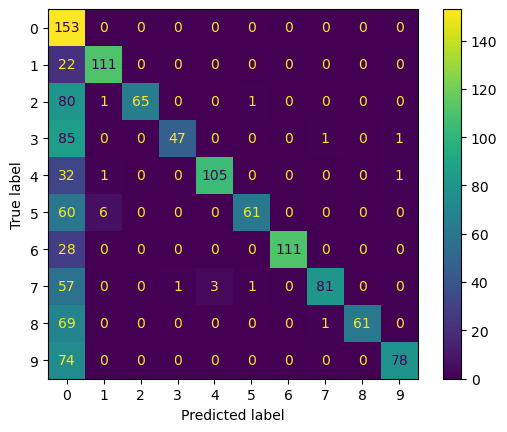

In [117]:
rf_cm =confusion_matrix(y_test.values.argmax(axis=1), 
                        rf_pred.argmax(axis=1));
ConfusionMatrixDisplay(rf_cm).plot()

### KNN Model

In [118]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA

In [119]:
def cross_val(X_train, y_train, k, num_split = 20):

    X_train = X_train.values
    y_train = y_train.values
    
    score_train_list = []
    score_val_list = []
    
    for train_index, valid_index in KFold(n_splits = num_split).split(X_train):
       
        #train & validation splitting (folds)
        X_train_fold, X_val_fold = X_train[train_index], X_train[valid_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[valid_index]
        
        #scaling and fitting on the train/val fold 
        scaler = StandardScaler()
        X_tf_sc = scaler.fit_transform(X_train_fold)
        X_vld_sc = scaler.transform(X_val_fold)
        
        #creating and fitting knn 
        knn = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
        knn.fit(X_tf_sc, y_train_fold)
        
        #scores
        acc_tr = knn.score(X_tf_sc, y_train_fold)
        acc_val = knn.score(X_vld_sc, y_val_fold)
        score_val_list.append(acc_val)
        score_train_list.append(acc_tr)
        
    return {'k': k, 'train': np.mean(score_train_list), 
                                    'validation': np.mean(score_val_list)}

In [120]:
crossval_df = pd.DataFrame(columns = ['k', 'train', 'validation'])

for k in range(1, 100):
    result = cross_val(X_train, y_train, k, 5)
    crossval_df = crossval_df.append(result, ignore_index=True)

In [121]:
crossval_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   k           99 non-null     float64
 1   train       99 non-null     float64
 2   validation  99 non-null     float64
dtypes: float64(3)
memory usage: 2.4 KB


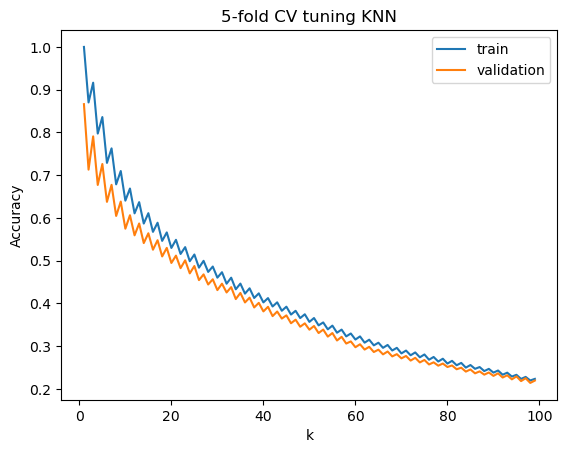

In [182]:
fig, ax = plt.subplots()
sns.lineplot(x = 'k', y = 'train', 
             data = crossval_df, 
             ax = ax, label = 'train')
sns.lineplot(x = 'k', y = 'validation', 
             data = crossval_df,
             ax = ax, label = 'validation')
ax.set_ylabel('Accuracy')
ax.set_title('5-fold CV tuning KNN')

plt.show()

In [123]:
crossval_df.iloc[crossval_df['validation'].idxmax()]

k             1.000000
train         1.000000
validation    0.866137
Name: 0, dtype: float64

In [124]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train_scaled, y_train)

knn_pred = knn.predict(X_test_scaled)

In [133]:
X_train_scaled.shape

(4191, 39)

In [135]:
X_test_scaled.shape

(1398, 39)

In [136]:
y_test.shape

(1398, 10)

In [137]:
y_train.shape

(4191, 10)

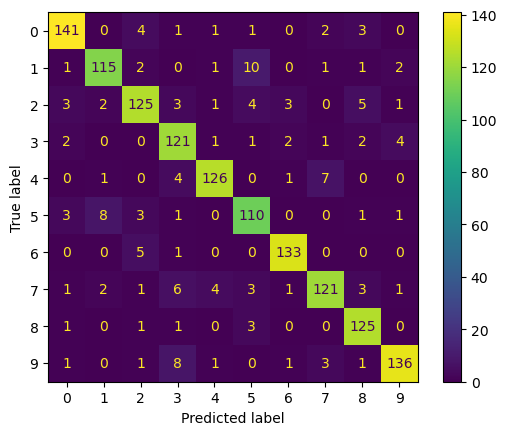

In [185]:
knn_cm =confusion_matrix(y_test.values.argmax(axis=1), 
                        knn_pred.argmax(axis=1));
ConfusionMatrixDisplay(knn_cm).plot()

In [163]:
knn_accuracy = accuracy_score(y_test, knn_pred)
print('Accuracy:', knn_accuracy)
knn_precision = precision_score(y_test, knn_pred, average = 'macro')
print('Precission:',knn_precision)
knn_recall = recall_score(y_test, knn_pred, average = 'macro')
print('Recall:',knn_recall)

Accuracy: 0.8962804005722461
Precission: 0.8959736172367772
Recall: 0.8964095738610609


In [164]:
print("\nClassification Report:\n", classification_report(y_test, knn_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       153
           1       0.90      0.86      0.88       133
           2       0.88      0.85      0.87       147
           3       0.83      0.90      0.86       134
           4       0.93      0.91      0.92       139
           5       0.83      0.87      0.85       127
           6       0.94      0.96      0.95       139
           7       0.90      0.85      0.87       143
           8       0.89      0.95      0.92       131
           9       0.94      0.89      0.92       152

   micro avg       0.90      0.90      0.90      1398
   macro avg       0.90      0.90      0.90      1398
weighted avg       0.90      0.90      0.90      1398
 samples avg       0.90      0.90      0.90      1398



In [176]:
baseline_accuracy = knn.score(X_test_scaled, y_test)
print("Baseline Accuracy:", baseline_accuracy)

feature_importances = np.zeros(X_test_scaled.shape[1])

num_permutations = 100

for feature_idx in range(X_test_scaled.shape[1]):

    X_test_permuted = X_test_scaled.copy()
    
    np.random.shuffle(X_test_permuted[:, feature_idx])
    
    permuted_accuracy = knn.score(X_test_permuted, y_test)
    
    feature_importance = baseline_accuracy - permuted_accuracy
    feature_importances[feature_idx] = feature_importance

feature_importances /= feature_importances.sum()

print("Feature Importances:", feature_importances)


Baseline Accuracy: 0.8962804005722461
Feature Importances: [0.0327476  0.04392971 0.06629393 0.05271565 0.05191693 0.03913738
 0.03354633 0.02396166 0.0471246  0.01677316 0.0327476  0.02396166
 0.02635783 0.0399361  0.0327476  0.03035144 0.0327476  0.02555911
 0.03115016 0.0327476  0.01517572 0.02316294 0.03434505 0.014377
 0.01198083 0.01597444 0.014377   0.01677316 0.014377   0.01517572
 0.01597444 0.00559105 0.00638978 0.01517572 0.01517572 0.01996805
 0.00638978 0.01038339 0.01277955]


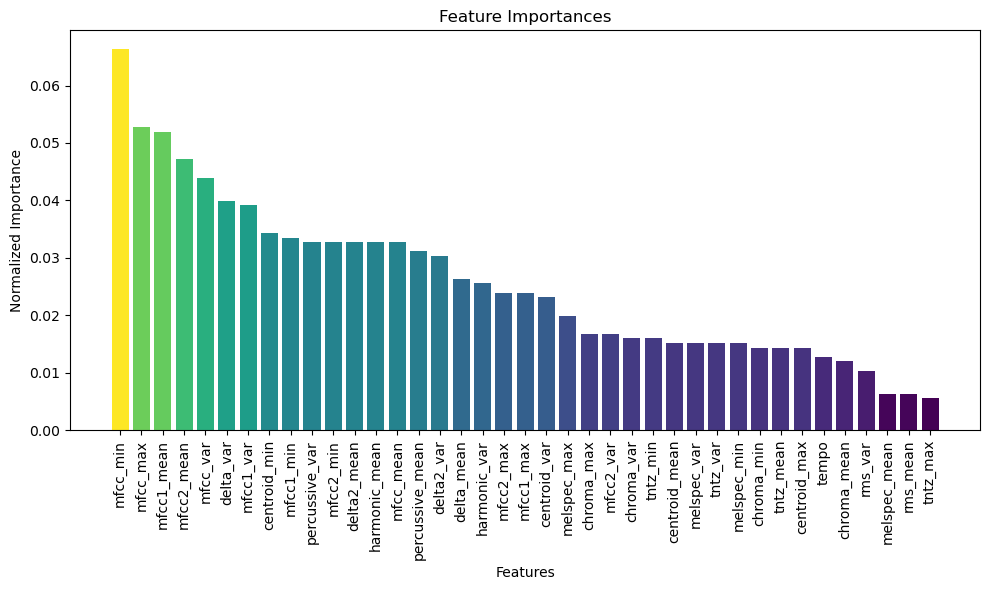

In [186]:
feature_names = X_test.columns

sorted_idx = np.argsort(feature_importances)[::-1]
sorted_importances = feature_importances[sorted_idx]

colormap = plt.get_cmap('viridis')

normalized_importances = (sorted_importances - sorted_importances.min()) / (sorted_importances.max() - sorted_importances.min())

colors = [colormap(importance) for importance in normalized_importances]


plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_names)), sorted_importances, align='center', color=colors)
plt.xticks(range(len(feature_names)), feature_names[sorted_idx], rotation=90)
plt.xlabel('Features')
plt.ylabel('Normalized Importance')
plt.title('Feature Importances')
plt.tight_layout()

plt.show()

### Saving KNN model for app deployment

In [44]:
import joblib

In [45]:
#saving model
#joblib.dump(knn, 'knn_model.pkl')

['knn_model.pkl']

### SVM GS Model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [ ]:
#target variable into a binary matrix
y = y.idxmax(axis=1)

In [ ]:
#redefining train-test-split
#train-test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.20, random_state = 42)

#validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=42)

In [ ]:
#normalizing
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [ ]:
param = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
}

In [ ]:
best_params = svm_gs.best_params_
print(best_params)
best_model = svm_gs.best_estimator_
print(best_model)

In [ ]:
svm_model = SVC()
svm_gs = GridSearchCV(svm_model, param, cv=5, n_jobs=-1)
svm_gs.fit(X_train_scaled, y_train)

In [ ]:
svm_pred = best_model.predict(X_test_scaled)

In [ ]:
accuracy = accuracy_score(y_test, svm_pred)
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, svm_pred))

In [ ]:
results = svm_gs.cv_results_

params = results['params']
mean_test_scores = results['mean_test_score']

labels = [f"{param['kernel']} (C={param['C']})" for param in params]

plt.figure(figsize=(10, 6))
plt.plot(labels, mean_test_scores, marker='o')
plt.xlabel('Hyperparameter Settings')
plt.ylabel('Mean Test Accuracy')
plt.title('Accuracy of SVM/SVC Model for Different Hyperparameter Settings')
plt.xticks(rotation=45, ha='right')
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
svm_cm =confusion_matrix(y_test, 
                        svm_pred);
ConfusionMatrixDisplay(svm_cm).plot()

In [ ]:
svm_accuracy = accuracy_score(y_test, svm_pred)
print('Accuracy:', svm_accuracy)
svm_precision = precision_score(y_test, svm_pred, average = 'macro')
print('Precission:',svm_precision)
svm_recall = recall_score(y_test, svm_pred, average = 'macro')
print('Recall:',svm_recall)

## Models with Label Encoded Genres

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
le = LabelEncoder()
le = LabelEncoder()
music_df['genres_encoded'] = le.fit_transform(music_df['genre_y'])
music_df

,file_name,mfcc_mean,mfcc_var,mfcc_min,mfcc_max,mfcc1_mean,mfcc1_var,mfcc1_min,mfcc1_max,mfcc2_mean,...,tntz_max,melspec_mean,melspec_var,melspec_min,melspec_max,rms_mean,rms_var,tempo,genre_y,genres_encoded
0,blues_69_segment_3.wav,-135.282870,108.55024,13.028976,43.992382,19.349297,20.206875,-1.577484,7.924092,1.519116,...,12.485189,9.272328,4.058815,12.436750,7.658901,3.056901,10.527410,7.565155,blues,0
1,blues_27_segment_4.wav,-91.254100,129.46655,-4.100496,45.220657,7.252443,16.338186,0.856577,0.009967,1.849428,...,25.550907,32.544811,9.085206,45.008915,46.512520,332.813812,129.471909,6.220565,blues,0
2,blues_54_segment_2.wav,-191.496080,139.01646,11.991453,28.216597,-0.720076,7.438097,6.724214,6.649870,-0.442536,...,10.569683,13.037652,0.732540,0.283661,0.217625,0.489818,1.817209,13.725842,blues,0
3,blues_33_segment_1.wav,-121.252815,123.47816,13.837003,28.114388,7.535354,15.141087,-3.699708,6.035746,0.958965,...,63.396244,21.241156,20.493299,11.539183,11.035036,10.340260,9.673729,3.113847,blues,0
4,blues.00009_segment_2.wav,-179.017550,138.22562,-30.912750,49.097755,-24.154978,7.536681,-9.466703,10.459454,-20.845018,...,17.512299,12.562430,19.704935,44.741116,11.275842,0.719824,0.769180,3.037273,blues,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6982,rock.00063_segment_2.wav,-329.291080,139.87671,53.949990,17.256727,17.011780,9.052016,8.448787,2.826561,0.794122,...,3.578562,1.214767,1.100771,1.418536,1.387431,0.550771,0.254566,0.513779,rock,9
6983,rock.00004_segment_1.wav,-167.203340,143.87451,12.607652,50.331360,-0.389795,35.844570,-3.877623,16.113270,-9.246787,...,18.517099,7.640218,10.939061,13.667733,5.664557,9.104764,4.784025,4.133267,rock,9
6984,rock_36_segment_5.wav,-269.519000,182.93669,9.128018,7.246886,6.279178,-1.525924,-8.689502,7.118561,-5.731806,...,7.530454,1.434070,0.361768,8.512635,1.714976,0.366517,7.676395,1.953892,rock,9
6985,rock_45_segment_3.wav,39.978085,83.57576,-13.916237,31.080480,9.406852,10.378225,-1.250743,9.424727,-1.540306,...,33.466774,29.012289,35.188614,17.988277,31.572403,30.429539,89.772820,35.103870,rock,9


In [54]:
music_df.drop(columns = 'file_name', inplace = True)

In [71]:
X = music_df.drop(columns=['genres_encoded'])
y = music_df[['genres_encoded']]

In [72]:
#train-test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.20, random_state = 42)

#validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=42)

In [73]:
#normalizing
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [74]:
param = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
}

In [75]:
svm_model = SVC()
svm_gs = GridSearchCV(svm_model, param, cv=5, n_jobs=-1)
svm_gs.fit(X_train_scaled, y_train)

/Users/kellyjara/anaconda3/envs/meowranda/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kellyjara/anaconda3/envs/meowranda/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kellyjara/anaconda3/envs/meowranda/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kellyjara/anaconda3/envs/meowranda/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversio

/Users/kellyjara/anaconda3/envs/meowranda/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kellyjara/anaconda3/envs/meowranda/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kellyjara/anaconda3/envs/meowranda/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kellyjara/anaconda3/envs/meowranda/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversio

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']})

In [76]:
best_params = svm_gs.best_params_
print(best_params)
best_model = svm_gs.best_estimator_
print(best_model)

{'C': 10, 'kernel': 'rbf'}
SVC(C=10)


In [77]:
svm_pred = best_model.predict(X_test_scaled)

In [78]:
accuracy = accuracy_score(y_test, svm_pred)
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, svm_pred))

Best Hyperparameters: {'C': 10, 'kernel': 'rbf'}
Accuracy: 0.8912732474964234

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94       153
           1       0.90      0.91      0.91       133
           2       0.87      0.88      0.87       147
           3       0.81      0.93      0.86       134
           4       0.95      0.86      0.91       139
           5       0.80      0.83      0.82       127
           6       0.93      0.93      0.93       139
           7       0.88      0.86      0.87       143
           8       0.94      0.91      0.93       131
           9       0.90      0.86      0.88       152

    accuracy                           0.89      1398
   macro avg       0.89      0.89      0.89      1398
weighted avg       0.89      0.89      0.89      1398



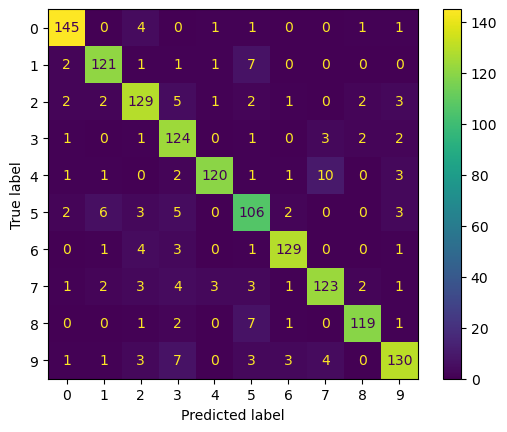

In [79]:
svm_cm =confusion_matrix(y_test, 
                        svm_pred);
ConfusionMatrixDisplay(svm_cm).plot()

In [80]:
svm_accuracy = accuracy_score(y_test, svm_pred)
print('Accuracy:', svm_accuracy)
svm_precision = precision_score(y_test, svm_pred, average = 'macro')
print('Precission:',svm_precision)
svm_recall = recall_score(y_test, svm_pred, average = 'macro')
print('Recall:',svm_recall)

Accuracy: 0.8912732474964234
Precission: 0.8924459735275725
Recall: 0.8910223549493039


## RNN LSTM Model - MFCC Features

In [89]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [81]:
mfcc = pd.read_csv('/Users/kellyjara/Desktop/Music_Classification/Data/mfcc.csv')
mfcc_df = pd.DataFrame(mfcc)
mfcc_df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,label
0,-80.0,-5.373055,-6.322748,-7.905452,-16.608902,-9.817526,-11.959373,-11.541872,-16.981678,-24.437847,...,-32.105938,-80.000000,-80.000000,-80.0000,-20.061068,-80.000000,-80.000000,-80.000000,-17.931187,0
1,-80.0,-2.372444,-7.009487,-9.630412,-16.625700,-10.870303,-80.000000,-22.130718,-80.000000,-24.546850,...,-15.680571,-80.000000,-22.737434,-80.0000,-18.341770,-22.605436,-15.160420,-80.000000,-80.000000,0
2,-80.0,-1.871225,-11.246706,-8.025139,-12.312158,-11.786739,-10.196889,-10.125285,-18.231392,-15.545910,...,-17.350794,-18.014662,-80.000000,-80.0000,-27.716154,-80.000000,-36.134840,-80.000000,-80.000000,0
3,-80.0,-0.727390,-8.803666,-8.473115,-80.000000,-17.322235,-21.517681,-11.740473,-14.926936,-12.030826,...,-15.910123,-16.958126,-26.440540,-80.0000,-80.000000,-80.000000,-20.455551,-24.667341,-30.008951,0
4,-80.0,-1.198540,-22.873518,-12.717636,-80.000000,-10.542625,-80.000000,-16.053448,-80.000000,-10.148211,...,-80.000000,-23.631989,-19.350496,-16.9179,-80.000000,-80.000000,-15.314171,-17.853876,-80.000000,0


In [83]:
X = mfcc_df.drop('label', axis=1).values
y = mfcc_df['label'].values

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = .20)

In [85]:
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(np.array(X_train, dtype = float))
X_val_sc = scaler.transform(np.array(X_val, dtype = float))
X_test_sc = scaler.transform(np.array(X_test, dtype = float))

In [93]:
#without regularization

In [91]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=128, input_shape=(X_train_sc.shape[1], 1), return_sequences=True),
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.LSTM(units=64),
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(units=32, activation='relu'),  
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

In [92]:
model_1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model1_hist = model_1.fit(X_train_sc, y_train, epochs=50, batch_size=225, validation_data=(X_val_sc, y_val))

Epoch 1/50
18/18 [==============================] - 13s 478ms/step - loss: 2.3022 - accuracy: 0.1046 - val_loss: 2.3007 - val_accuracy: 0.1247
Epoch 2/50
18/18 [==============================] - 7s 404ms/step - loss: 2.2988 - accuracy: 0.1138 - val_loss: 2.2949 - val_accuracy: 0.1247
Epoch 3/50
18/18 [==============================] - 7s 402ms/step - loss: 2.2905 - accuracy: 0.1181 - val_loss: 2.2826 - val_accuracy: 0.1329
Epoch 4/50
18/18 [==============================] - 7s 404ms/step - loss: 2.2834 - accuracy: 0.1396 - val_loss: 2.2778 - val_accuracy: 0.1360
Epoch 5/50
18/18 [==============================] - 8s 472ms/step - loss: 2.2771 - accuracy: 0.1406 - val_loss: 2.2797 - val_accuracy: 0.1401
Epoch 6/50
18/18 [==============================] - 8s 454ms/step - loss: 2.2735 - accuracy: 0.1472 - val_loss: 2.2828 - val_accuracy: 0.1309
Epoch 7/50
18/18 [==============================] - 7s 409ms/step - loss: 2.2681 - accuracy: 0.1501 - val_loss: 2.2675 - val_accuracy: 0.1319
Epoch

In [95]:
loss, accuracy = model_1.evaluate(X_train_sc, y_train)
print(f":loss: {loss}, accuracy: {accuracy}")
test_loss = model_1.evaluate(X_val_sc, y_val)
print(f'Test Loss: {test_loss}')

123/123 [==============================] - 4s 36ms/step - loss: 2.0686 - accuracy: 0.2513
:loss: 2.068629503250122, accuracy: 0.2512781322002411
31/31 [==============================] - 1s 34ms/step - loss: 2.1224 - accuracy: 0.2454
Test Loss: [2.1223812103271484, 0.24539877474308014]


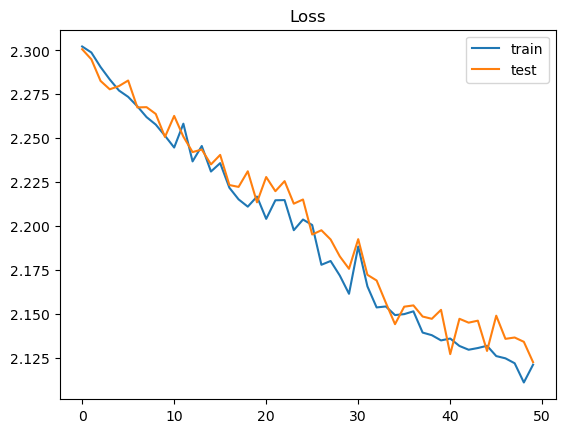

In [97]:
plt.title('Loss')
plt.plot(model1_hist.history['loss'], label='train')
plt.plot(model1_hist.history['val_loss'], label='test')
plt.legend()
plt.show();

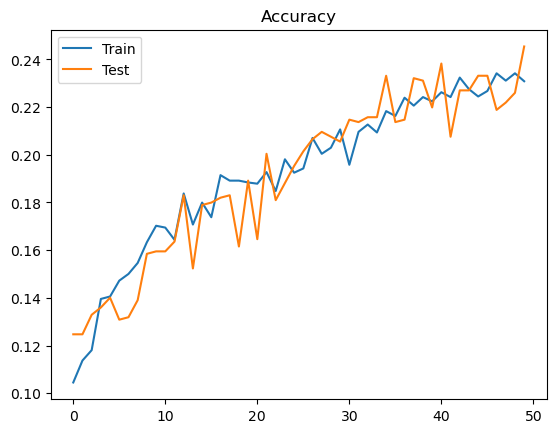

In [99]:
plt.title('Accuracy')
plt.plot(model1_hist.history['accuracy'], label = 'Train')
plt.plot(model1_hist.history['val_accuracy'], label = "Test")
plt.legend()
plt.show()

In [100]:
#with regularization

In [116]:
from tensorflow.keras.regularizers import L2

reg_lambda = 0.01 #reg strength

model_2 = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=128, input_shape=(X_train_sc.shape[1], 1), return_sequences=True,
                        kernel_regularizer=L2(reg_lambda)),
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.LSTM(units=64, kernel_regularizer=L2(reg_lambda)),
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(units=32, activation='relu', kernel_regularizer=L2(reg_lambda)),  
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(units=16, activation='relu',kernel_regularizer=L2(reg_lambda)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=10, activation='softmax', kernel_regularizer=L2(reg_lambda))
])

In [117]:
model_2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model2_hist = model_2.fit(X_train_sc, y_train, epochs=50, batch_size=225, validation_data=(X_val_sc, y_val))

Epoch 1/50
18/18 [==============================] - 13s 462ms/step - loss: 4.4027 - accuracy: 0.1043 - val_loss: 4.0097 - val_accuracy: 0.1125
Epoch 2/50
18/18 [==============================] - 7s 396ms/step - loss: 3.7430 - accuracy: 0.1191 - val_loss: 3.4605 - val_accuracy: 0.1738
Epoch 3/50
18/18 [==============================] - 8s 441ms/step - loss: 3.2832 - accuracy: 0.1439 - val_loss: 3.1028 - val_accuracy: 0.1585
Epoch 4/50
18/18 [==============================] - 7s 401ms/step - loss: 2.9834 - accuracy: 0.1690 - val_loss: 2.8691 - val_accuracy: 0.1677
Epoch 5/50
18/18 [==============================] - 8s 414ms/step - loss: 2.7843 - accuracy: 0.1636 - val_loss: 2.7112 - val_accuracy: 0.1513
Epoch 6/50
18/18 [==============================] - 8s 450ms/step - loss: 2.6540 - accuracy: 0.1641 - val_loss: 2.5969 - val_accuracy: 0.1646
Epoch 7/50
18/18 [==============================] - 8s 450ms/step - loss: 2.5512 - accuracy: 0.1774 - val_loss: 2.5180 - val_accuracy: 0.1616
Epoch

In [118]:
loss, accuracy = model_2.evaluate(X_train_sc, y_train)
print(f":loss: {loss}, accuracy: {accuracy}")
test_loss = model_2.evaluate(X_val_sc, y_val)
print(f'Test Loss: {test_loss}')

123/123 [==============================] - 4s 33ms/step - loss: 2.2288 - accuracy: 0.1971
:loss: 2.2288167476654053, accuracy: 0.1970858871936798
31/31 [==============================] - 1s 34ms/step - loss: 2.2514 - accuracy: 0.1830
Test Loss: [2.2514002323150635, 0.18302658200263977]


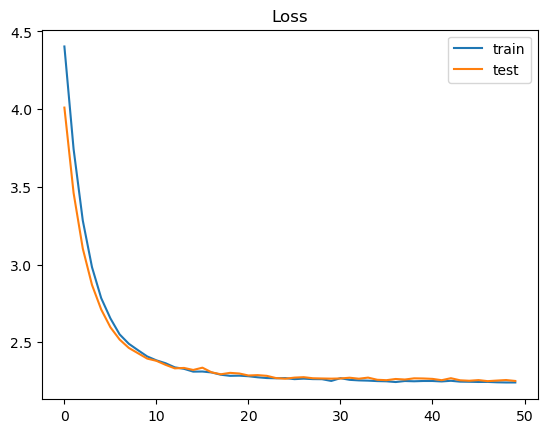

In [119]:
plt.title('Loss')
plt.plot(model2_hist.history['loss'], label='train')
plt.plot(model2_hist.history['val_loss'], label='test')
plt.legend()
plt.show();

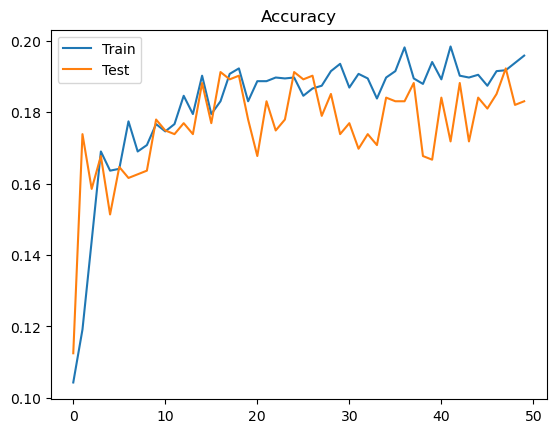

In [120]:
plt.title('Accuracy')
plt.plot(model2_hist.history['accuracy'], label = 'Train')
plt.plot(model2_hist.history['val_accuracy'], label = "Test")
plt.legend()
plt.show()

## RNN LSTM Model - Spectrogram Featuers

In [123]:
spectrogram = pd.read_csv('/Users/kellyjara/Desktop/Music_Classification/Data/spectrogram.csv')
spec_df = pd.DataFrame(spectrogram)
spec_df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,label
0,-14.251838,-13.122309,-17.378595,-19.016870,-19.089672,-17.880081,-23.351181,-32.613007,-34.962963,-30.712912,...,-42.086105,-43.506080,-39.105614,-39.922960,-40.942955,-42.006210,-42.275425,-41.509205,-44.791510,0
1,-12.428816,-17.256380,-18.799640,-19.021170,-19.608223,-22.834064,-16.038242,-8.856348,-7.850418,-16.071945,...,-46.514070,-48.036354,-49.952156,-51.625275,-53.129400,-52.573864,-55.373750,-53.135370,-55.536080,0
2,-7.222175,-7.465009,-9.467773,-15.350006,-24.655840,-22.813179,-20.164675,-23.900408,-38.443485,-31.208973,...,-53.659267,-54.747837,-60.761158,-61.606316,-57.550750,-58.037480,-60.899445,-59.296980,-62.759600,0
3,-13.839224,-13.039390,-18.652845,-29.813875,-20.888810,-16.828560,-19.395489,-26.127188,-29.592663,-31.395107,...,-54.769577,-53.704840,-53.416397,-53.807476,-55.259468,-54.551190,-56.562866,-57.151756,-60.965576,0
4,-19.986414,-22.005198,-18.739420,-18.591976,-15.725191,-22.208080,-28.902262,-24.956005,-20.785997,-16.100275,...,-43.896725,-46.755570,-52.995403,-55.550240,-53.113583,-56.862617,-61.081062,-61.500280,-61.719170,0


In [125]:
X = spec_df.drop('label', axis=1).values
y = spec_df['label'].values

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = .20)

In [127]:
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(np.array(X_train, dtype = float))
X_val_sc = scaler.transform(np.array(X_val, dtype = float))
X_test_sc = scaler.transform(np.array(X_test, dtype = float))

In [128]:
X_train_reshaped = X_train_sc.reshape((X_train_sc.shape[0], 1, X_train_sc.shape[1]))
X_test_reshaped = X_test_sc.reshape(X_test_sc.shape[0], 1, X_test_sc.shape[1])
X_val_reshaped = X_val_sc.reshape(X_val_sc.shape[0], 1, X_val_sc.shape[1])

In [129]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=128, input_shape=(X_train_sc.shape[1], 1), return_sequences=True),
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.LSTM(units=64),
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(units=32, activation='relu'),  
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(units=10, activation='softmax')
])

In [130]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train_sc, y_train, epochs=50, batch_size=225, validation_data=(X_val_sc, y_val))

Epoch 1/50
19/19 [==============================] - 18s 562ms/step - loss: 2.2454 - accuracy: 0.1524 - val_loss: 2.1843 - val_accuracy: 0.2023
Epoch 2/50
19/19 [==============================] - 10s 512ms/step - loss: 2.1597 - accuracy: 0.1911 - val_loss: 2.1066 - val_accuracy: 0.2338
Epoch 3/50
19/19 [==============================] - 10s 522ms/step - loss: 2.1054 - accuracy: 0.2254 - val_loss: 2.0617 - val_accuracy: 0.2624
Epoch 4/50
19/19 [==============================] - 9s 480ms/step - loss: 2.0728 - accuracy: 0.2474 - val_loss: 2.0424 - val_accuracy: 0.2719
Epoch 5/50
19/19 [==============================] - 9s 491ms/step - loss: 2.0493 - accuracy: 0.2512 - val_loss: 2.0631 - val_accuracy: 0.2595
Epoch 6/50
19/19 [==============================] - 10s 508ms/step - loss: 2.0390 - accuracy: 0.2519 - val_loss: 2.0337 - val_accuracy: 0.2863
Epoch 7/50
19/19 [==============================] - 9s 495ms/step - loss: 2.0241 - accuracy: 0.2636 - val_loss: 2.0299 - val_accuracy: 0.2767
Ep

In [131]:
loss, accuracy = model.evaluate(X_train_sc, y_train)
print(f":loss: {loss}, accuracy: {accuracy}")
test_loss = model.evaluate(X_val_sc, y_val)
print(f'Test Loss: {test_loss}')

131/131 [==============================] - 4s 34ms/step - loss: 1.7352 - accuracy: 0.3635
:loss: 1.7352458238601685, accuracy: 0.3635496199131012
33/33 [==============================] - 1s 34ms/step - loss: 1.9125 - accuracy: 0.3273
Test Loss: [1.9124633073806763, 0.3272900879383087]


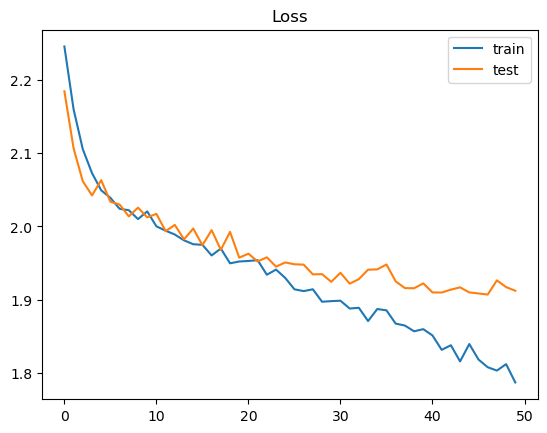

In [132]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

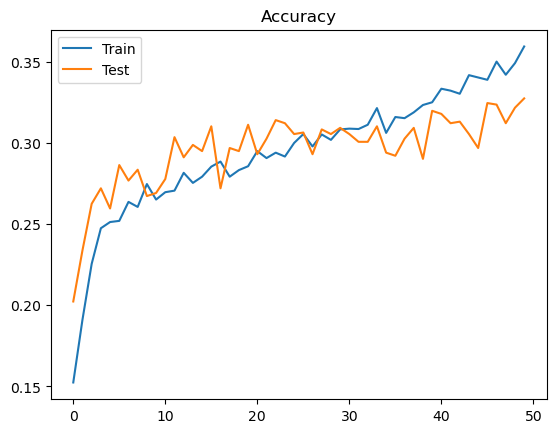

In [133]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label = 'Train')
plt.plot(history.history['val_accuracy'], label = "Test")
plt.legend()
plt.show()

In [134]:
#with regularization

reg_lambda = 0.01  # Regularization strength

model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=128, input_shape=(X_train_sc.shape[1], 1), return_sequences=True,
                         kernel_regularizer=L2(reg_lambda)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(units=64, kernel_regularizer=L2(reg_lambda)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=32, activation='relu', kernel_regularizer=L2(reg_lambda)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=10, activation='softmax', kernel_regularizer=L2(reg_lambda))
])

In [135]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train_sc, y_train, epochs=50, batch_size=225, validation_data=(X_val_sc, y_val))

Epoch 1/50
19/19 [==============================] - 14s 499ms/step - loss: 4.1858 - accuracy: 0.1601 - val_loss: 3.7686 - val_accuracy: 0.1765
Epoch 2/50
19/19 [==============================] - 8s 408ms/step - loss: 3.5071 - accuracy: 0.1765 - val_loss: 3.2130 - val_accuracy: 0.2090
Epoch 3/50
19/19 [==============================] - 8s 407ms/step - loss: 3.0425 - accuracy: 0.2016 - val_loss: 2.8456 - val_accuracy: 0.2223
Epoch 4/50
19/19 [==============================] - 8s 405ms/step - loss: 2.7594 - accuracy: 0.2185 - val_loss: 2.6378 - val_accuracy: 0.2185
Epoch 5/50
19/19 [==============================] - 8s 409ms/step - loss: 2.5643 - accuracy: 0.2202 - val_loss: 2.4943 - val_accuracy: 0.2443
Epoch 6/50
19/19 [==============================] - 8s 406ms/step - loss: 2.4345 - accuracy: 0.2357 - val_loss: 2.3785 - val_accuracy: 0.2366
Epoch 7/50
19/19 [==============================] - 8s 409ms/step - loss: 2.3454 - accuracy: 0.2390 - val_loss: 2.3093 - val_accuracy: 0.2567
Epoch

In [136]:
loss, accuracy = model.evaluate(X_train_sc, y_train)
print(f":loss: {loss}, accuracy: {accuracy}")
test_loss = model.evaluate(X_val_sc, y_val)
print(f'Test Loss: {test_loss}')

131/131 [==============================] - 5s 36ms/step - loss: 1.9725 - accuracy: 0.3206
:loss: 1.9725148677825928, accuracy: 0.3206106722354889
33/33 [==============================] - 1s 34ms/step - loss: 2.0314 - accuracy: 0.3006
Test Loss: [2.031367540359497, 0.3005725145339966]


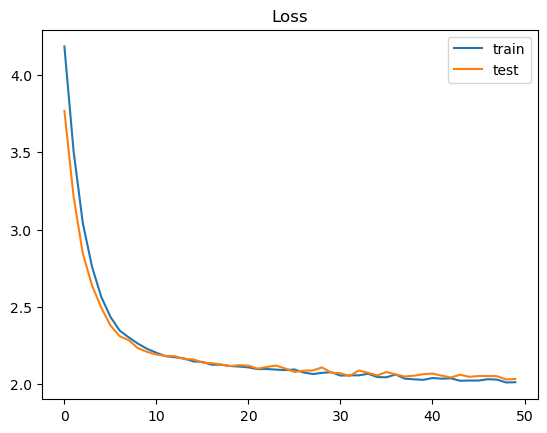

In [137]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

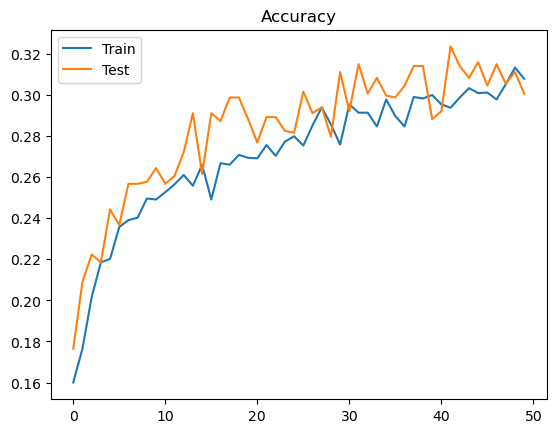

In [138]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label = 'Train')
plt.plot(history.history['val_accuracy'], label = "Test")
plt.legend()
plt.show()